<a href="https://colab.research.google.com/github/urness/CS167Fall22Code/blob/main/Day17Notes_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**bold text**# Day 17 Notes: Principal Component Analysis & Dimensionality Reduction

## Feature Selection
- [Sklearn SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)


In [2]:
from google.colab import drive
import pandas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score

#load data
drive.mount('/content/drive')
data = pandas.read_csv('/content/drive/MyDrive/CS167Fall22/Datasets/irisData.csv')
predictors = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = "species"

train_data, test_data, train_sln, test_sln = \
    train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)

#fit your selector just like you do when training with a classifier/regressor
#only do this after splitting into train and test sets - don't let the test
#set spoil your predictions
selector = SelectKBest(k=2)
selector.fit(train_data,train_sln)

print('Here are the scores of each feature:')
print(selector.scores_)
print(predictors)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Here are the scores of each feature:
[ 83.17181699  48.65999233 962.36229917 894.63459428]
['sepal length', 'sepal width', 'petal length', 'petal width']


In [3]:
#take a look at the training data
train_data[0:6]

,sepal length,sepal width,petal length,petal width
79,5.7,2.6,3.5,1.0
54,6.5,2.8,4.6,1.5
106,4.9,2.5,4.5,1.7
90,5.5,2.6,4.4,1.2
145,6.7,3.0,5.2,2.3
14,5.8,4.0,1.2,0.2


In [4]:
#transforming the predictor columns of the training set
train_transformed = selector.transform(train_data)

print("Here's what the training predictors look like after the transformation. \
Notice that it's just the last two columns from the original data.")
train_transformed[0:6]

Here's what the training predictors look like after the transformation. Notice that it's just the last two columns from the original data.


array([[3.5, 1. ],
       [4.6, 1.5],
       [4.5, 1.7],
       [4.4, 1.2],
       [5.2, 2.3],
       [1.2, 0.2]])

In [5]:
#Now we transform the predictor columns in the test set as well.
#Notice that we're using the selector that we trained using the training set.
#Do not re-fit it to the test data. 
test_transformed = selector.transform(test_data)

#Now we can use our transformed data with a classifier just like always:
clf = KNeighborsClassifier()
clf.fit(train_transformed,train_sln)
predictions = clf.predict(test_transformed)
print('Accuracy:',accuracy_score(test_sln,predictions))

Accuracy: 0.9333333333333333


## Feature Extraction
- [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [ ]:
import pandas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

#load data
data = pandas.read_csv('/content/drive/MyDrive/CS167Spring22/datasets/irisData.csv')
predictors = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = "species"

train_data, test_data, train_sln, test_sln = \
    train_test_split(data[predictors], data[target], test_size = 0.2, random_state=1)

#whiten = True is important for uncorrelated
#attributes, and is False by default
extractor = PCA(n_components=2, whiten=True)
#When fitting with PCA, you do not use the target column - this is an unsupervised learning algorithm
extractor.fit(train_data)

print('this is the variance/importance of each component')
print(extractor.explained_variance_ratio_)

this is the variance/importance of each component
[0.92859758 0.0474831 ]


In [ ]:

print("Here's what the data looks like before being transformed:")
train_data[0:4]

Here's what the data looks like before being transformed:


,sepal length,sepal width,petal length,petal width
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1


In [ ]:
train_transformed = extractor.transform(train_data)

print("Here's what the training predictors look like after the transformation.")
train_transformed[0:4]


Here's what the training predictors look like after the transformation.


array([[ 0.40446601,  0.00616923],
       [ 1.46396527,  1.48755977],
       [-0.00791473, -1.15083283],
       [ 1.00017476, -0.4027048 ]])

In [ ]:
#Now we transform the predictor columns in the test set as well.
#Notice that we're using the extractor that we trained using the training set.
#Do not re-fit it to the test data. 
test_transformed = extractor.transform(test_data)

#Now we can use our transformed data with a classifier just like always:
clf = KNeighborsClassifier()
clf.fit(train_transformed,train_sln)
predictions = clf.predict(test_transformed)
print('Accuracy:',accuracy_score(test_sln,predictions))

Accuracy: 0.9


In [ ]:

print('Here are the two vectors (in the original space) that define our 2 new axes:')
print(extractor.components_[0])
print(extractor.components_[1])

Here are the two vectors (in the original space) that define our 2 new axes:
[ 0.36473622 -0.07245354  0.85441261  0.36290089]
[ 0.64892255  0.73464162 -0.17722287 -0.08827952]


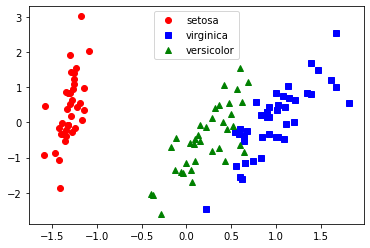

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#visualizing the new axes
#PCA gives it back as numpy array
tdf = pandas.DataFrame(train_transformed)
#next line: probably not the best way
tdf['species'] = pandas.Series(list(train_sln)) 


setosa_series = tdf[ tdf['species'] == 'Iris-setosa' ]
virginica_series = tdf[ tdf['species'] == 'Iris-virginica' ]
versicolor_series = tdf[ tdf['species'] == 'Iris-versicolor']

plt.plot(setosa_series[0],setosa_series[1],'ro',label='setosa')
plt.plot(virginica_series[0],virginica_series[1],'bs',label='virginica')
plt.plot(versicolor_series[0],versicolor_series[1],'g^',label='versicolor')
plt.legend(loc='upper center')
plt.show()

# In Class Exercise
Tuesday, March 29th 

1. Input the boston housing dataset (download from Blackboard datasets)
2. Run a Support Vector Regressor ( [Here's the sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) ) to get a baseline to compare to.
3. Output the R2 score for your baseline SVR
4. Use PCa to reduce the dimensions to 2 
5. Run a SVR on your transformed data
6. Output the R2 score for your dimensionality reduced data. 
7. Play around... see what you can change (the number of dimensions, gamma, C, etc), to improve your R2 score. Use the sklearn documentation if you're unsure what these will do.
8. Be ready to discuss what combination gave you the best R2 score when we come back to the whole class. 

In [ ]:
#In Class Exercise:
import pandas
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn import metrics


# read in the data
data = pandas.read_csv('/content/drive/MyDrive/CS167Spring22/datasets/boston_housing.csv')
predictors = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT']
target = "MEDV"
#create training and testing data
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)

In [ ]:
#Run a Support Vector Regressor on the data to get a baseline 


#Output the R2 Score for the test data



In [ ]:
#Use a Principal Component Analysis to reduce the dimensions to 2



In [ ]:
#Run a Support Vector Regressor on your transformed data



#Get the R2 score for the test data.

